Sorted Feature Importance:
Sex: 0.2903
PassengerId: 0.2347
Age: 0.1873
Pclass: 0.1225
Fare: 0.1038
SibSp: 0.0488
Parch: 0.0126
Sorted Feature Importance:
Sex: 0.5164
Pclass: 0.2050
Age: 0.1034
PassengerId: 0.0666
SibSp: 0.0652
Fare: 0.0382
Parch: 0.0052
Sorted Feature Importance:
Sex: 0.5856
Pclass: 0.2325
Age: 0.0632
SibSp: 0.0521
Fare: 0.0380
PassengerId: 0.0287
Parch: 0.0000


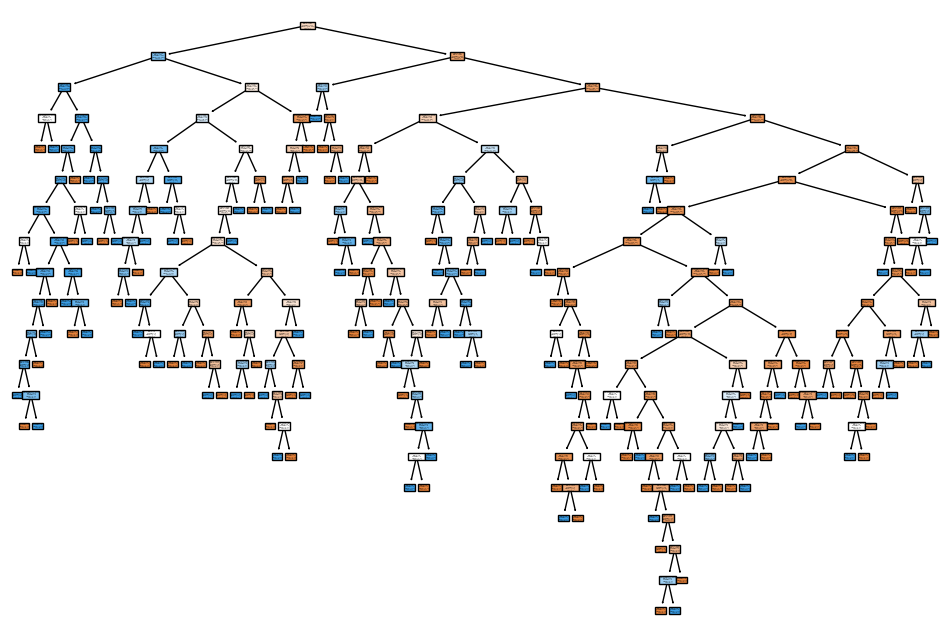

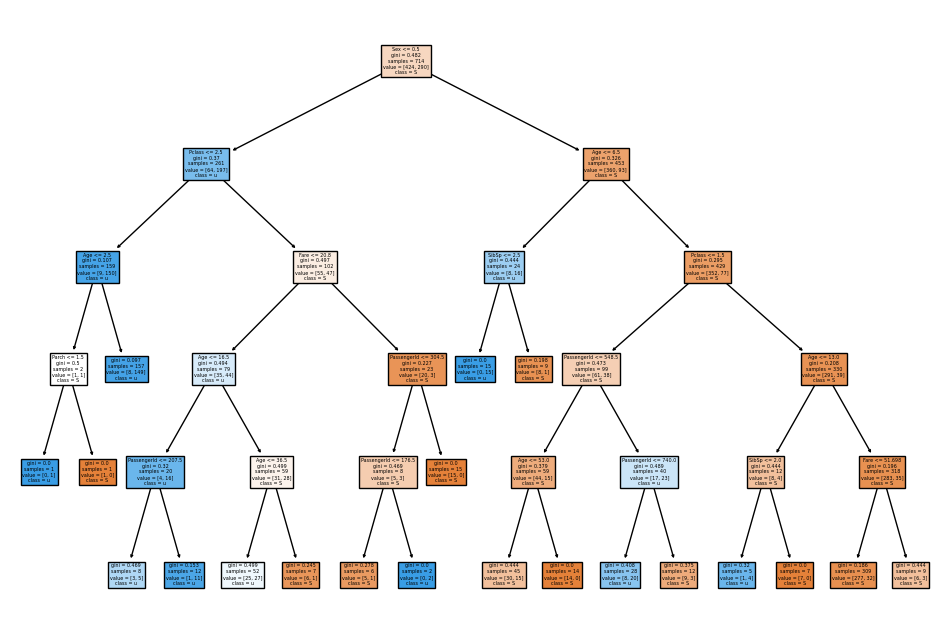

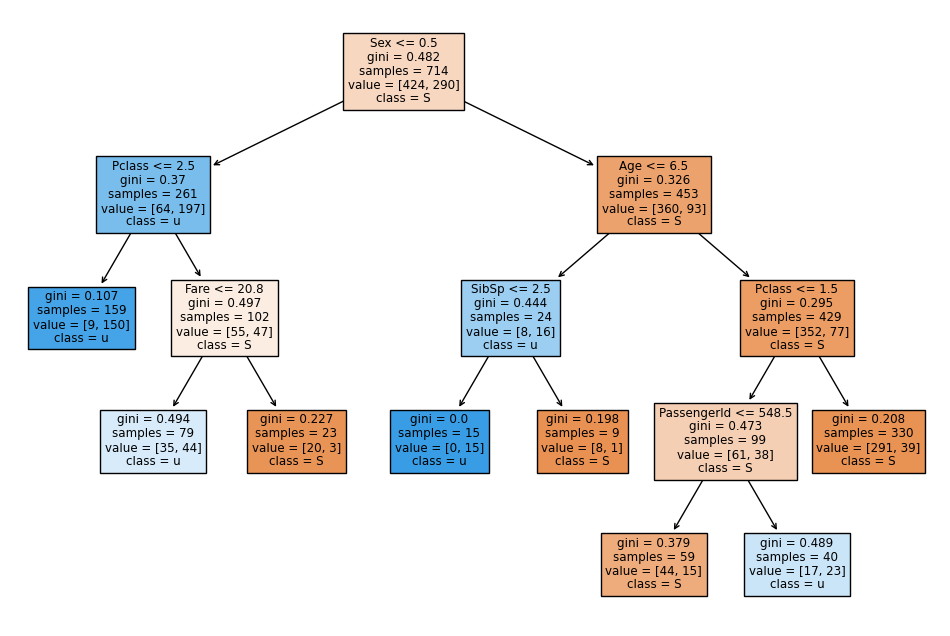

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import random
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Part A ##

# Read the image
np.set_printoptions(precision = 2, suppress = True)
data = pd.read_csv("titanic.csv")
data['Sex'] = data['Sex'].replace({'female': 0, 'male': 1}) # encode male and female
data = data.select_dtypes(include='number') # select only numeric data for tree
data = data.dropna()

X = data.drop("Survived", axis = 1)
y = data["Survived"]

clf = DecisionTreeClassifier()
clf.fit(X, y)

feature_names = X.columns.tolist()
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns.tolist(), class_names="Survived", filled=True)

importance = clf.feature_importances_
feature_importance = list(zip(feature_names, importance))
sorted_feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)

print("Sorted Feature Importance:")
for feature, importance_score in sorted_feature_importance:
    print(f"{feature}: {importance_score:.4f}")

plt.savefig("./images/QAtree1")


# Second more limited tree #
clf = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=20)
clf.fit(X, y)

feature_names = X.columns.tolist()
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns.tolist(), class_names="Survived", filled=True)

importance = clf.feature_importances_
feature_importance = list(zip(feature_names, importance))
sorted_feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)

print("Sorted Feature Importance:")
for feature, importance_score in sorted_feature_importance:
    print(f"{feature}: {importance_score:.4f}")

plt.savefig("./images/QAtree2")


# Third pruned/limited tree #
clf = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=8)
clf.fit(X, y)

feature_names = X.columns.tolist()
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns.tolist(), class_names="Survived", filled=True)

importance = clf.feature_importances_
feature_importance = list(zip(feature_names, importance))
sorted_feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)

print("Sorted Feature Importance:")
for feature, importance_score in sorted_feature_importance:
    print(f"{feature}: {importance_score:.4f}")

plt.savefig("./images/QAtree3")


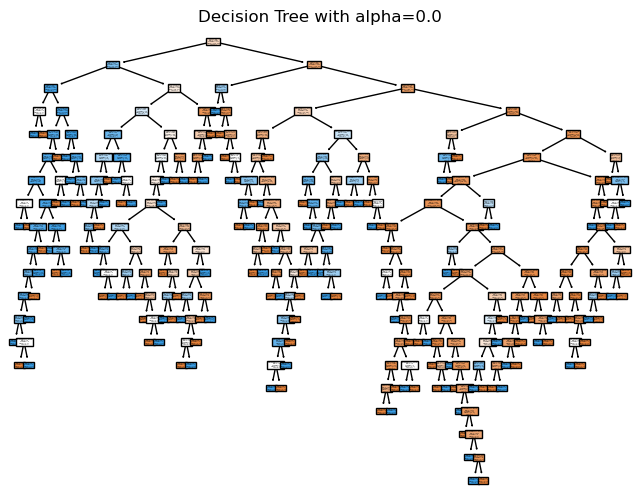

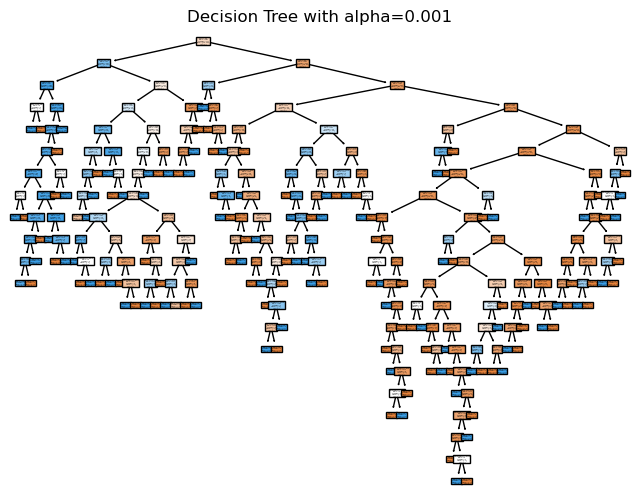

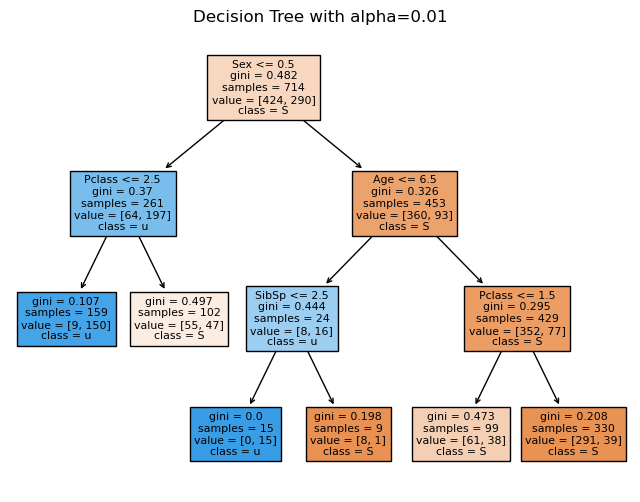

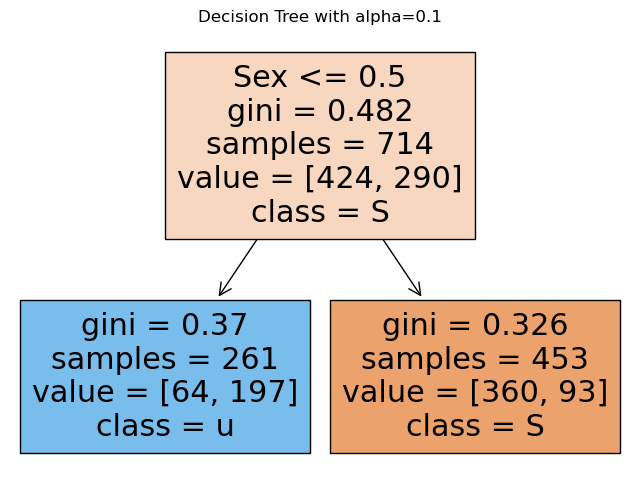

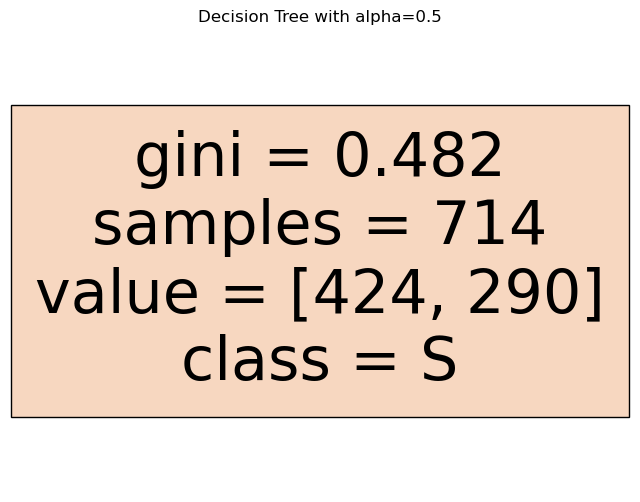

In [40]:
# PART B #

alpha_values = [0.0, 0.001, 0.01, 0.1, 0.5]


# Fit a decision tree classifier and visualize for each alpha value
i = 1
for alpha in alpha_values:
    clf = DecisionTreeClassifier(ccp_alpha=alpha)
    clf.fit(X, y)

    plt.figure(figsize=(8, 6))
    plot_tree(clf, feature_names=feature_names, class_names="Survived", filled=True)
    plt.title(f"Decision Tree with alpha={alpha}")
    plt.savefig("./images/Qbtree" + str(i))
    i += 1

Alpha: 0.0, Mean Accuracy: 0.7189, Std Deviation: 0.0916
Alpha: 0.001, Mean Accuracy: 0.7119, Std Deviation: 0.0907
Alpha: 0.01, Mean Accuracy: 0.8081, Std Deviation: 0.0375
Alpha: 0.1, Mean Accuracy: 0.7800, Std Deviation: 0.0378
Alpha: 0.5, Mean Accuracy: 0.5938, Std Deviation: 0.0028


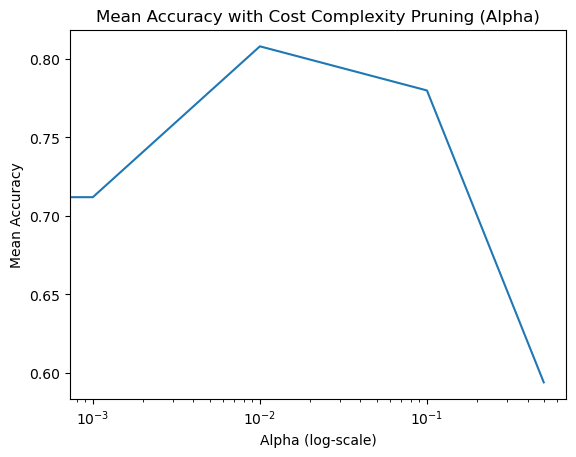

In [45]:
# PART C #

# 10 fold cross validation for each alpha
means = []
for alpha in alpha_values:
    clf = DecisionTreeClassifier(ccp_alpha=alpha)
    scores = cross_val_score(clf, X, y, cv=10)
    print(f"Alpha: {alpha}, Mean Accuracy: {np.mean(scores):.4f}, Std Deviation: {np.std(scores):.4f}")
    means.append(np.mean(scores))

plt.semilogx(alpha_values, means)
plt.title("Mean Accuracy with Cost Complexity Pruning (Alpha)")
plt.xlabel("Alpha (log-scale)")
plt.ylabel("Mean Accuracy")
plt.savefig("./images/Qc")
